In [1]:
# Basic image processing using python
# we'll work with the kaggle dataset of 96x96x3(RGB) patches
# using patches allows us to focus on the mechanics of image manipulation, without the complexity of large heterogenous WSI


In [2]:
## We'll initially work with scikit-image, though opencv and pillow are also frequently used in image processing in python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io
import os



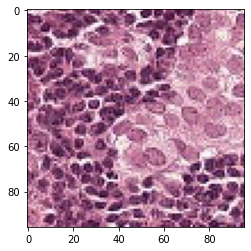

In [3]:
## begin by loading a small subset of the patches in the kaggle dataset
## 

testFilesLoc="/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test"

testimageLoc=os.path.join(testFilesLoc, "00006537328c33e284c973d7b39d340809f7271b.tif")
testimage=io.imread(testimageLoc)
testimage.shape
plt.imshow(testimage)

In [4]:
## create a list and populate it with image locations
## use the list to read in the images to a new list to manipulate
### lots of ways to do this, including glob(which behaves like unix) and walk(which returns a 2 column list of files and directories and is better for complex directory structures)

imlocs=[]


In [5]:
#locs=os.walk(testFilesLoc)
#count = 0
#for loc in locs: 
#    print(loc)

In [6]:
import glob

imlocs = [f for f in glob.glob(testFilesLoc+"/*.tif")]
imlocs_small=imlocs[0:6]
imlocs_small

['/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test/fd0a060ef9c30c9a83f6b4bfb568db74b099154d.tif',
 '/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test/1f9ee06f06d329eb7902a2e03ab3835dd0484581.tif',
 '/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test/19709bec800f372d0b1d085da6933dd3ef108846.tif',
 '/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test/7a34fc34523063f13f0617f7518a0330f6187bd3.tif',
 '/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test/93be720ca2b95fe2126cf2e1ed752bd759e9b0ed.tif',
 '/Users/johnalanwillis/Documents/ilc-nodalMet-ML/ilc-nodalMet-ML/datasets/test/761dde7de22cb39a0dd67ce472163d66e5ac1568.tif']

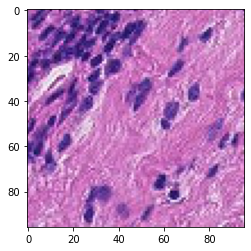

In [7]:
imfiles_small=[]

for imloc in imlocs_small: 
    imfiles_small.append(io.imread(imloc))
    
imfiles_small[1]
plt.imshow(imfiles_small[0])

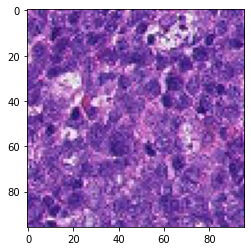

In [8]:
## Two ways to work with lists in python that make sense to my R brain

a=list(map(plt.imshow, imfiles_small))

b=[plt.imshow(imfile) for imfile in imfiles_small] 
    



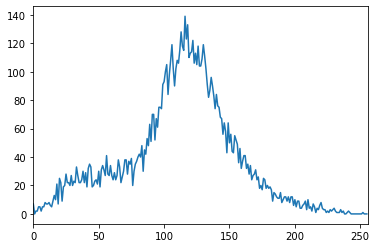

In [16]:
## Having generated a list of images to play with, lets play
## We'll begin with the most basic sorts of image analysis
## Lets observe the distribution of intensities for our images by generating simple histograms
## this isn't even really an image operation, we're simply summarizing the contents of the np arrays generated by reading in images
## NOTE: np.histogram() returns a tuple - the the histogram values and the bin edges
## NOTE: both components of np.histogram are necessary to plot the histogram

list_histograms=list(map(lambda imfile: np.histogram(imfile[:,:,0], bins = 256, range=(0,1)), imfiles_small))

list_histograms_comp=[np.histogram(imfile[:,:,0], bins=256, range=(0,256)) for imfile in imfiles_small]

a = list_histograms_comp[0]
a1 = a[1]
a0 = a[0]
a1

plt.xlim([0, 256])
plt.plot(a1[0:-1], a0)


In [29]:
def plotHist(histTuple, color = 0): 
    vals_hist = histTuple[0]
    vals_bins = histTuple[1]
    
    plt.xlim([0, 256])
    thePlot=plt.plot(a1[0:-1], a0)
    return thePlot

def getHist_color(imfile):
    colorList = ["r", "g", "b"]
    hists_color = [np.histogram(imfile[:,:,ind], bins = 256, range=(0,256)) for ind, color in  enumerate(colorList)]
    return hists_color

def plotHist_color(histTuple, colorVal): 
    vals_hist = histTuple[0]
    vals_bins = histTuple[1]
    
    plt.xlim([0, 256])
    thePlot=plt.plot(vals_bins[0:-1], vals_hist, color=colorVal)
    return thePlot

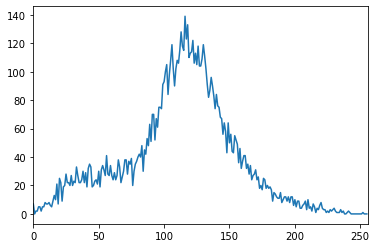

In [19]:
a = list_histograms_comp[0]

plotHist(a)



[[<matplotlib.lines.Line2D at 0x7f95097d64d0>],

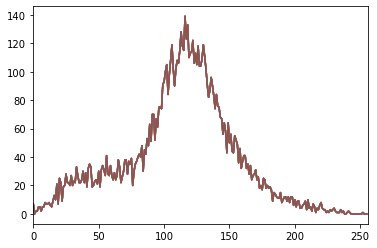

In [21]:
[plotHist(hist) for hist in list_histograms_comp]

In [ ]:


[plotHist_color(hist)]

In [32]:
list_colorHist=[getHist_color(imageFile) for imageFile in imfiles_small]

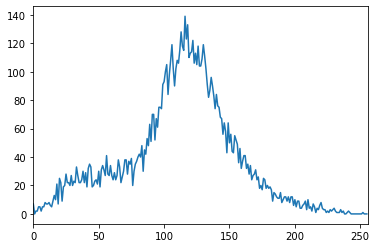

In [44]:
list_colorHist[0][1]
plotHist_color(list_colorHist[0], "r")

In [45]:
## Next create a simple mask based on an intensity threshold
def applyThresholdMask(imageFile, threshold): 
    mask = imageFile < threshold
    imageFile[mask] = 0
    imageFile

    

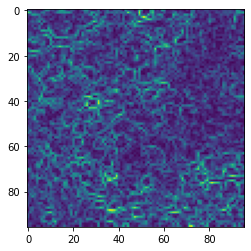

In [48]:
## Explore some of the built-in filters from skimage
## We'll import edge detection filters and see what they do with our test images
from skimage.filters import roberts, sobel, scharr
test_roberts = roberts(testimage[:,:,0])
plt.imshow(test_roberts)

In [57]:

[[roberts(image[:,:,colorVal]) for image in imfiles_small] for colorVal in [0,1,2]]

[[array([[0.10154516, 0.04999039, 0.051131  , ..., 0.06655123, 0.25398023,
          0.45098039],
         [0.08636359, 0.17785946, 0.28399577, ..., 0.09411765, 0.08383356,
          0.19607843],
         [0.07193701, 0.15610109, 0.1835403 , ..., 0.09897592, 0.08433652,
          0.23529412],
         ...,
         [0.04999039, 0.1078966 , 0.11907629, ..., 0.13333333, 0.21742614,
          0.11764706],
         [0.09737027, 0.13080063, 0.11490263, ..., 0.04738449, 0.03921569,
          0.03137255],
         [0.01176471, 0.1372549 , 0.09411765, ..., 0.09411765, 0.00784314,
          0.        ]]),
  array([[0.02111829, 0.03615508, 0.05849582, ..., 0.01240109, 0.01960784,
          0.02745098],
         [0.09255234, 0.08825708, 0.02111829, ..., 0.01386484, 0.02286648,
          0.01568627],
         [0.18309988, 0.08433652, 0.00620054, ..., 0.02616013, 0.03892046,
          0.03921569],
         ...,
         [0.07808748, 0.04159452, 0.0316167 , ..., 0.36839793, 0.01960784,
          0.0

SyntaxError: unexpected EOF while parsing (<ipython-input-54-495a67101137>, line 1)

[0, 1, 2]